## Gene set enrichment and pathway analysis 

1. Introduction
2. Pathway and gene set collections
3. Types of gene set tests
4. Gene set tests and pathway analysis
5. Technical considerations
    - Filtering out the gene sets with low number of genes 
    - Data normalisation
6. Take aways
7. Case study
8. References

### 1. Introduction

Differential gene expression analysis is almost always followed by *gene set enrichment analysis*, where the aim is to identify gene programs, such as biological processes, gene ontologies or regulatory pathways that are over-represented in an experimental condition compared to control or other conditions, on the basis of differentially expressed (DE) genes. 

Single-cell RNA-seq provides unprecedented insights into variations in cell types between conditions, tissue types, species and individuals. Often, it is of interest to identify pathways or biological processes enriched in a particular cell type, for example, in disease condition compared to control. To determine the pathways enriched in a cell type-specific manner between two conditions, first a relevant collection of gene set signatures is selected, where each gene set defines a biological processes (e.g. epithelial to mesechymal transition, metabolism etc) or pathway (e.g. MAPK signalling). For each gene set in the collection, DE genes present in the gene set are used to obtain a test statistic that is then used to assess the enrichment of the gene set. Depending on the type of the enrichment test chosen, gene expression measurements may or may not be used for the computation of test statistic. 

In this chapter, we first provide an overview of different types of gene set enrichment tests, introduce some commonly used gene signature collections and discuss best practices for pathway enrichment and functional enrichment analysis in general.  We conclude the chapter by demonstrating three analytical approaches for gene set enrichment analysis. Note that we use the terms pathway analysis, pathway enrichment analysis, gene set enrichment analysis and functional analysis interchangeably in this chapter. 

### 2. Pathway and gene set collections

Gene sets are a curated list of gene names (or gene ids) that are known to be involved in a biological process through previous studies and/or experiments. The Molecular Signatures Database (MSigDB) {cite}`subramanian2005gene,liberzon2011molecular` is the most comprehensive database consisting of 9 collections of gene sets. Some commonly used collections are C5 the GO or gene ontology collection, C2 collection of curated gene signatures from published studies that are typically context (e.g. tissue, condition) specific, but also include KEGG and REACTOME gene signatures. For cancer studies, the Hallmark collection is commonly used, and for immunologic studies the C7 collection is a common choice. Note that these signatures are mainly derived from Bulk-seq measurements and measure continuous phenotypes. Recently and with the wide-spread availability of scRNA-seq datasets, databases have evolved that provide curated marker lists derived from published single cell studies that define cell types in various tissues and species. These include CellMarker {cite}`zhang2019cellmarker` and PanglaoDB {cite}`franzen2019panglaodb`. 

### 3. Types of gene set tests

Gene set tests can be *competitive* or *self-contained* as defined by Goeman and Buhlmann (2007) {cite}`goeman2007analyzing`. Competitive gene set testing tests whether the genes in the set are highly ranked in terms of differential expression relative to the genes not in the set. The sampling unit here is genes, so the test can be done with a single sample. The test requires genes that are not in the set. In self-contained gene set testing, the sampling unit is the subject, so multiple samples per group are required, but it is not required to have genes that are not present in the set. A self-contained gene set test tests whether genes in the test set are differentially expressed without regard to any other gene measured in the dataset. Note that in biological data there exist inter-gene correlations. There are only a few tests that accomodate inter-gene correlations. We will discuss these methods later. Detailed explanations on various gene set tests can be found in *limma* user manual.

### 4.  Gene set tests and pathway analysis

In scRNA-seq data analysis, gene set enrichment is generally carried out on clusters of cells or cell types, one-at-a-time. Genes differentially expressed in a cluster or cell type are used to identify over-represented gene sets from the selected collection, using, for example, simple hypergeomtric tests, Fisher's exact test (as in *Enrichr* {cite} `chen2013enrichr`, for example). Such tests do not require the actual gene expression measurements and read counts to compute an enrichment statistics.

More commonly though *fgsea* {cite}`korotkevich2021fast` is used to test for enriched gene sets, which computes an enrichment score using some signed statistics of the genes in the gene set, for example, the t-statistics from differential expression test. An empricial null distribution is computed for the enrichment score, using some random gene sets of the same size, and a p-value is computed to determine the significance of the enrichment score. The p-values are then adjusted for multiple hypothesis testing. *fgsea* is a computationally faster implementation of the well established *Gene Set Enrichment Analysis (GSEA)* algorithm {cite}`subramanian2005gene` which computes enrichment statistics on the basis of some preranked gene-level test statistics. GSVA {cite}`hanzelmann2013gsva` is another example of preranked gene set enrichment approaches.

An alternative approach to test for gene set enrichment in a group of cells, that is clusters or cells of identical types, is to create pseudo-bulk samples from single cells and use gene set enrichment methods developed for Bulk RNA-seq. Several self-contained and competitive gene set enrichment tests, namely *fry* and *camera* are implememted in *limma* {cite} `ritchie2015limma`, which are compatible with the differential gene expression analysis framework through linear models and Empirical Bayes moderation of test statistics. Linear models can accomodate complex experimental designs (e.g. subjects, perturbations, batches, nested contrasts, interactions etc) through the design matrix. In addition, the `camera` and `roast` gene set tests implemented in limma account for inter-gene correlations. Gene set tests in *limma* can also be applied to (properly transformed and normalised) single cell measurements without pseudo-bulk generation. However, there are currently no benchmarks that had assessed the accuracy of gene set test results when these methods are applied directly to single cells.  

#### Gene set test vs. pathway activity inference 

Gene set tests test whether a pathway is enriched, in other words over-represented, in one condition compared to others, say, in healthy donors compared to severe COVID-19 patients in the monocyte population. An alternative approach is to simply score the activity of a pathway or gene signature, in absolute sense, in individual cells, rather than testing for a differential activity between conditions. Some of the widely used tools for inference of gene set activity in general (including pathway activity) in individual cells include *VISION* {cite}`detomaso2019functional`, *AUCell* {cite}`aibar2017scenic`, pathway overdispersion analysis using *Pagoda2* {cite}`fan2016characterizing, lake2018integrative` and simple combined z-score {cite}`lee2008inferring`. 

*DoRothEA* {cite}`garcia2019benchmark` and *PROGENy* {cite}`schubert2018perturbation` are among functional analysis tools developed to infer transcription factor (TF) - target activities originally in Bulk RNA data. Holland et al. {cite}`holland2020robustness` found that Bulk RNA-seq methods *DoRothEA* and *PROGENy* have optimal performance in simulated scRNA-seq data, and even partially outperform tools specifically designed for scRNA-seq analysis despite the drop-out events and low library sizes in single cell data. Holland et al. also concluded that pathway and TF activity inference is more sensitive to the choice of gene sets rather than the statistical methods. In contrast to Holand et al., Zhang et al. {cite}`zhang2020benchmarking` found that single-cell-based tools outperform bulk-base methods from three different aspects of accuracy, stability and scalability. It should be noted that pathway and gene set activity inference tools inherently do not account for batch effects or biological variations other than the biological variation of interest. Therefore, it is up to the data analyst to ensure that the differential gene expression analysis step has worked properly.

Furthermore, while the tools mentioned here score every gene set in individual cells, they are not able to select for the most biologically relevant gene sets among all scored gene sets. scDECAF {cite} is a gene set activity inference tool that allows data-driven selection of the most informative gene sets, thereby aid in dissecting meaningful cellular heterogeneity.

%# TODO: scDECAF citation

### 5. Technical considerations

#### Filtering out the gene sets with low number of genes 

A common practice is to exclude any gene sets with small number of genes overlapping the data or Highly Variable Genes (HVG) in the pre-processing step. Zhang et al. {cite}`zhang2020benchmarking` found that the performance of both single-cell-based and bulk-based methods drops as gene coverage, that is the number of genes in pathways/gene sets, decreases. Holland et al {cite}`holland2020robustness` also found that low gene coverage adversely impacts the performance of Bulk-seq *DoRothEA* and *PROGENy* on single cell data. These report collectively support that filtering gene sets with low gene coverage, say less than 12 or 10 genes in the set, is beneficial in pathway analysis. Zhang et al. additionally found that pathway analysis was susceptible to normalisation procedures applied to gene expression measurements.

#### Data normalisation

Read counts in single cell experiments are typically normalised early on in the pre-processing pipeline to ensure that measuerments are comparable across cells of various library sizes. Zhang et al. {cite}`zhang2020benchmarking` found that normalisation by *SCTransform* {cite}`hafemeister2019normalization` and *scran* {cite}`lun2016step` generally improves the performance of both single-cell- and bulk-based pathway scoring tools. They found that the performance of *AUCell* and *z-score* is particularly affected by normalization with distinct methods.

### 6. Take aways

- Normalise your data using standard scRNA-seq normalisation methods namely SCTransform and scran, and filter gene sets with low gene coverage in your data prior to pathway analysis.
- Be aware of different types of gene set testing tests (i.e. competitive vs self-contained) and use one that suits your application.
- Be aware of differences between gene set enrichment and gene set activity inference. *fgsea* is the widely used gene set test in single-cell studies; Pagoda 2 is found to outperform other pathway acitivity scoring tools. If your datasets has complex experimental design, consider pseudo-bulk analysis with gene set tests implemented in *limma*, as they are compatible with the linear model framework can additionally account for inter-gene correlations. 

# Case study: Pathway enrichment analysis and activity level scoring in human PBMC single cells

## Prepare and explore the data

We first download the data and follow the standard `scanpy` workflow for normalisation of read counts and subsetting on the highly variable genes. The dataset contains untreated and IFN-stimulated human PBMC cells.
We explore patterns of variation in the data with UMAP representation of 4000 highly variable genes. 

In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import gdown
import anndata2ri
import rpy2
from rpy2.robjects import r
import random


anndata2ri.activate()

In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
suppressPackageStartupMessages({
    library(SingleCellExperiment)
#     library(Seurat)
#     library(SeuratDisk)
    library(fgsea)
    library(AUCell)
    library(ggplot2)
})

In [5]:
id = "1bd8R8hy8GL3QPgTVdHWtFqdPqbGUdLE9"
gdown.download(id=id, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1bd8R8hy8GL3QPgTVdHWtFqdPqbGUdLE9
To: /storage/groups/ml01/workspace/hediyehzadeh.s/projects/bp-pathway/kang_count.h5ad
100%|██████████| 765M/765M [00:02<00:00, 279MB/s] 


'kang_count.h5ad'

In [6]:
adata = sc.read("kang_count.h5ad")
adata

AnnData object with n_obs × n_vars = 13576 × 14053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type'

In [7]:
adata.layers['counts'] = adata.X

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [9]:
adata_ = adata.copy()

In [10]:
sc.pp.highly_variable_genes(
    adata_,
    n_top_genes=4000,
    flavor="seurat_v3",
    subset=True,
    layer="counts"
)

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/bp-pathway/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [11]:
adata_

AnnData object with n_obs × n_vars = 13576 × 4000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [12]:
adata

AnnData object with n_obs × n_vars = 13576 × 14053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type'
    uns: 'log1p'
    layers: 'counts'

In [13]:
import umap

X = adata_.X
trans = umap.UMAP(
    n_neighbors=10,
    random_state=42,
    min_dist=0.4,
)
adata_.obsm["X_umap"] = trans.fit_transform(X)

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/bp-pathway/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


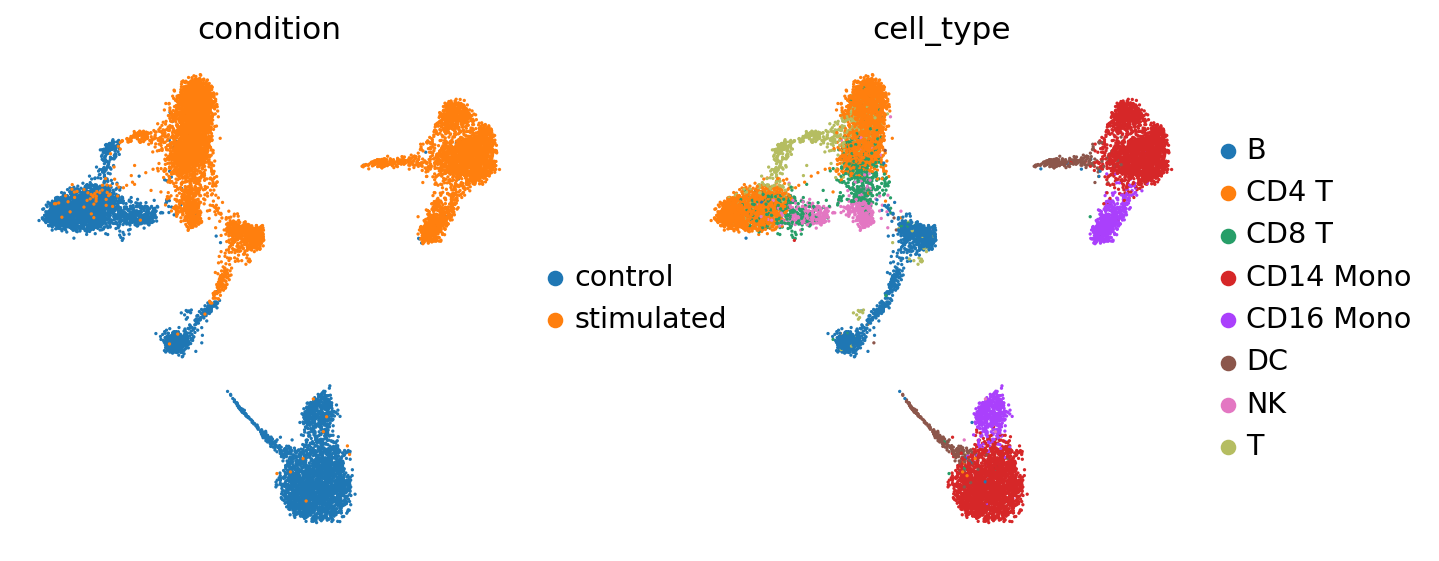

In [14]:
sc.pl.umap(
    adata_,
    color=["condition", "cell_type"],
    frameon=False,
    ncols=2,
)

In [15]:
adata

AnnData object with n_obs × n_vars = 13576 × 14053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type'
    uns: 'log1p'
    layers: 'counts'

Using a simple t-test, we use `rank_genes_groups` in `scanpy` to rank genes according to their test statistics.

In [16]:
adata.obs['group'] = adata.obs.condition.astype('string') + "_" + adata.obs.cell_type

In [17]:
adata_.obs['group'] = adata_.obs.condition.astype('string') + "_" + adata_.obs.cell_type

In [18]:
# find DE genes by t-test
sc.tl.rank_genes_groups(adata_, 'group', method='t-test', key_added = "t-test")

Let's extract the ranks for genes differentially expressed in response to IFN stimulation in the CD16 Monocyte cluster. We use these ranks and the gene sets from REACTOME to find gene sets enriched in this cell population compared to all other populations using `fgsea`. 

In [19]:
celltype_condition = 'stimulated_CD16 Mono' # 'stimulated_B',  'stimulated_CD8 T', 'stimulated_CD14 Mono'
# adata_.uns['t-test']['names'][celltype_condition]

In [20]:
# adata_.uns['t-test']['pvals_adj'][celltype_condition]

In [21]:
# compute ranks and export to r
ranked_genes_ = adata_.uns['t-test']['names'][celltype_condition]

In [22]:
# adata_.uns['t-test']['names']

In [23]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_
head(ranked_genes)

[1] "IFITM3"  "TNFSF10" "ISG15"   "TYROBP"  "MS4A7"   "IFIT1"  


In [24]:
stats_ = adata_.uns['t-test']['scores'][celltype_condition]

In [25]:
%%R -i stats_
stats = stats_

In [26]:
%%R
names(stats) = ranked_genes

## Cluster-level gene set enrichment analysis with fgsea

Download and read the `gmt` file for the REACTOME pathways annotated in the C2 collection of MSigDB. The `gmt` file has to be manually located and downloaded from [MSigDB website](https://www.gsea-msigdb.org/gsea/msigdb/). 

`fgsea` uses the t-statistics from the t-test to rank the genes for the CD16 Monocyte phenotype upon IFN stimulation and computes p-values for each of the pathways annotated in the `gmt` file. `fgsea` also adjusts the p-values for Multiple hypotheis testing. Install `fgsea` from [Bioconductor](https://bioconductor.org/packages/release/bioc/html/fgsea.html). Note that by default, `fgsea` keeps gene sets with a minimum size of 15 genes, and a maximum of 500 genes. We make a bar plot of top 20 pathways significantly enriched in stimulated CD16 Monocytes compared to all other cell types.

In [27]:
%%R
pathways <- gmtPathways('c2.cp.reactome.v7.5.1.symbols.gmt')

In [28]:
%%R
fgseaRes <- fgsea(pathways = pathways, 
                  stats    = stats,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)

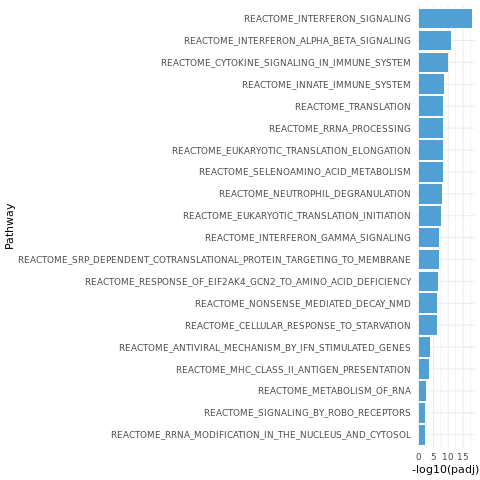

In [29]:
%%R

ggdat <- fgseaRes[order(fgseaRes$padj, decreasing=FALSE), ][1:20,]
ggplot(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [30]:
%%R
head(ggdat, n=10)

                                         pathway         pval         padj
 1:                REACTOME_INTERFERON_SIGNALING 4.130080e-21 9.292681e-19
 2:     REACTOME_INTERFERON_ALPHA_BETA_SIGNALING 7.944472e-14 8.937531e-12
 3: REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM 2.112827e-12 1.584620e-10
 4:                REACTOME_INNATE_IMMUNE_SYSTEM 3.675750e-11 2.067609e-09
 5:   REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION 2.028483e-10 7.252291e-09
 6:                     REACTOME_RRNA_PROCESSING 1.800333e-10 7.252291e-09
 7:                         REACTOME_TRANSLATION 2.256268e-10 7.252291e-09
 8:         REACTOME_SELENOAMINO_ACID_METABOLISM 2.643025e-10 7.433509e-09
 9:            REACTOME_NEUTROPHIL_DEGRANULATION 5.541617e-10 1.385404e-08
10:   REACTOME_EUKARYOTIC_TRANSLATION_INITIATION 1.414715e-09 3.183109e-08
      log2err         ES       NES size
 1: 1.1866510  0.8993954  2.865077   56
 2: 0.9545416  0.9374926  2.549532   25
 3: 0.8986712  0.6380103  2.472007  164
 4: 0.8513391  

In the plot above, pathway names are given in the y-axis. The x-axis is the $-\log_{10}$adjusted p-values. Therefore the longer the height of the bar, the more significant the pathway is. Pathways are ordered by significance. The majority of interferon-related pathways are indeed ranked among the top 20 most significantly enriched pathways. Some of the IFN-related pathways include, REACTOME_INTERFERON_SIGNALING (ranked 1), REACTOME_INTERFERON_ALPHA_BETA_SIGNALING (ranked 2nd), REACTOME_INTERFERON_GAMMA_SIGNALING (ranked 11th). Overall, `fgsea` did a decent job in identifying the pathways known to be associated with interferon signalling.

In [31]:
adata_

AnnData object with n_obs × n_vars = 13576 × 4000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'group'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'condition_colors', 'cell_type_colors', 't-test'
    obsm: 'X_umap'
    layers: 'counts'

In [32]:
adata_.obs.dtypes

orig.ident                category
nCount_RNA                   int64
nFeature_RNA                 int64
stim                      category
seurat_annotations        category
integrated_snn_res.0.5       int64
seurat_clusters              int64
condition                 category
cell_type                 category
group                     category
dtype: object

In [33]:
adata_.var.dtypes

highly_variable            bool
highly_variable_rank    float32
means                   float64
variances               float64
variances_norm          float64
dtype: object

We apply some minor pre-processing here, including putting the count data back in the `.X` slot of the anndata object to proceed to the next part - that is, scoring the pathway activity levels per cell, for which we use another Bioconductor package, `AUCell`. Install this package from [here](https://bioconductor.org/packages/release/bioc/html/AUCell.html).

In [34]:
del adata_.uns
del adata_.obs

In [35]:
#put counts back
adata_.X = adata_.layers['counts']

## Cell-level pathway activity scoring using AUCell

Unlike the previous approach where we assessed gene set *enrichment* per *cluster* (or rather cell type), one can *score* the activity level of pathways and gene sets in each individual cell, that is based on absolute gene expression in the cell, regardless of expression of genes in the other cells. This we can achieve by activity scoring tools such as `AUCell`.

In [36]:
%%R -i adata_
adata_

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/bp-pathway/lib/python3.8/site-packages/anndata2ri/r2py.py:102: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/bp-pathway/lib/python3.8/site-packages/anndata2ri/r2py.py:102: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(exprs, obs, var, uns, obsm or None, layers=layers)


class: SingleCellExperiment 
dim: 4000 13576 
metadata(0):
assays(2): X counts
rownames(4000): AL627309.1 NOC2L ... AP001626.1 AP001062.7
rowData names(5): highly_variable highly_variable_rank means variances
  variances_norm
colnames(13576): AAACATACATTTCC.1 AAACATACCAGAAA.1 ... TTTGCATGCTAAGC.1
  TTTGCATGGGACGA.1
colData names(0):
reducedDimNames(1): UMAP
mainExpName: NULL
altExpNames(0):


The AUC scores are calculated in two steps: 1. Building the rankings `AUCell_buildRankings` and 2. Calculate enrichment `AUCell_calcAUC`. This is equivalent to using `AUCell_run` in Bioconductor 3.15 and R 4.2.0 :

In [37]:
%%R
# Bioconductor 3.15 and R 4.2.0
# adata_aucell <- AUCell_run(adata_ , pathways)

cells_rankings <- AUCell_buildRankings(adata_, plotStats=FALSE)
cells_AUC <- AUCell_calcAUC(pathways, cells_rankings)

R[write to console]: Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



   min     1%     5%    10%    50%   100% 
 99.00 120.75 137.00 145.00 176.00 663.00 


R[write to console]: Warning in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores,  :
R[write to console]: 
 
R[write to console]:  Using only the first 200 genes (aucMaxRank) to calculate the AUC.

R[write to console]: Warning in .AUCell_calcAUC(geneSets = geneSets, rankings = rankings, nCores = nCores,  :
R[write to console]: 
 
R[write to console]:  The following gene sets will be excluded from the analysis(less than 20% of their genes are available):
REACTOME_INTERLEUKIN_6_SIGNALING, REACTOME_APOPTOSIS, REACTOME_HEMOSTASIS, REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS, REACTOME_MAPK3_ERK1_ACTIVATION, REACTOME_RECOGNITION_AND_ASSOCIATION_OF_DNA_GLYCOSYLASE_WITH_SITE_CONTAINING_AN_AFFECTED_PURINE, REACTOME_ACTIVATION_OF_BAD_AND_TRANSLOCATION_TO_MITOCHONDRIA, REACTOME_RELEASE_OF_APOPTOTIC_FACTORS_FROM_THE_MITOCHONDRIA, REACTOME_FORMATION_OF_APOPTOSOME, REACTOME_ACTIVATION_OF_CASPASES_THROUGH_APOPTOSOME_MEDIATED_CLEAVAGE, REACTOME_CYTOCHROME_C_MEDIATED_APOPTOTIC_RES

In [38]:
%%R
dim(cells_AUC)

[1]   446 13576


In [39]:
%%R

aucell_scores <- data.frame(cells_AUC@assays@data$AUC)
rownames(aucell_scores) <- cells_AUC@NAMES
colnames(aucell_scores) <- colnames(adata_)

Export the results back to python 

In [40]:
%%R -o aucell_scores  
# Needs to be a SingleCellExperiment
# adata_allen <- as(allen, 'SingleCellExperiment') 

NULL


In [41]:
%%R -o adata_ 

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


In [42]:
adata_

AnnData object with n_obs × n_vars = 13576 × 4000
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    obsm: 'X_umap'
    layers: 'counts'

In [43]:
aucell_scores = aucell_scores.T
# aucell_scores[ifn_pathways]

Plot the scores on the umap

We now add the scores for the interferon-related REACTOME pathways to the anndata object and annotate the activity level of these pathways in each of the cells on the UMAP:

In [44]:
ifn_pathways = ['REACTOME_INTERFERON_GAMMA_SIGNALING',
               'REACTOME_INTERFERON_SIGNALING',
               'REACTOME_INTERFERON_ALPHA_BETA_SIGNALING']

adata_.obs = aucell_scores[ifn_pathways]

In [45]:
adata_.obs['condition'] = adata.obs.condition
adata_.obs['cell_type'] = adata.obs.cell_type

<ipython-input-45-08040ba7231c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_.obs['condition'] = adata.obs.condition
<ipython-input-45-08040ba7231c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata_.obs['cell_type'] = adata.obs.cell_type


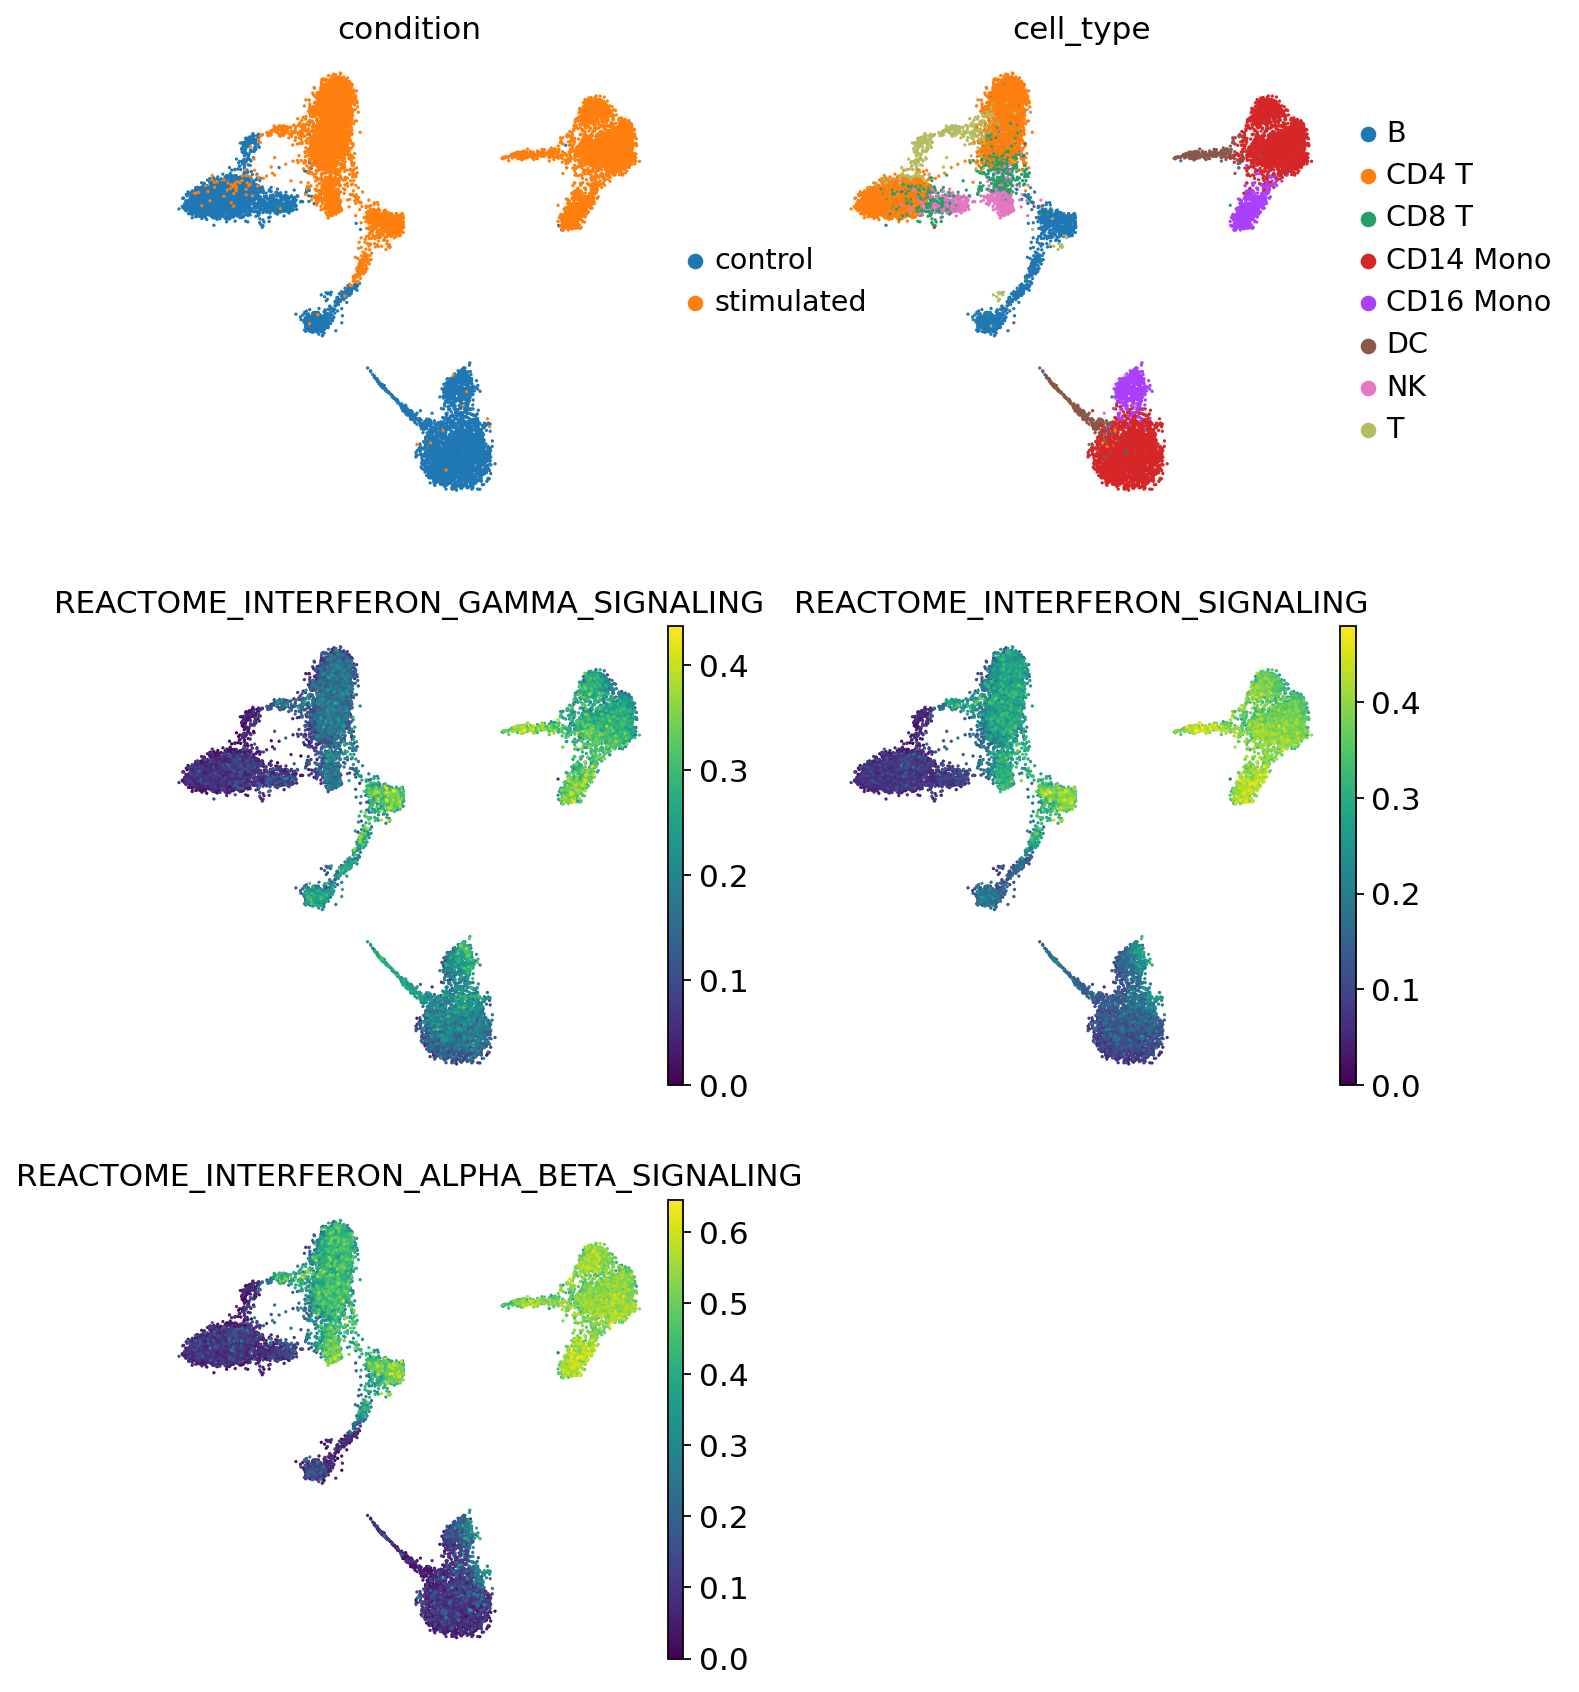

In [46]:
sc.pl.umap(
    adata_,
    color=["condition", "cell_type"]+ifn_pathways,
    frameon=False,
    ncols=2,
)

`AUCell` scores the pathways well-known to be implicated in interferon signalling high in IFN-stimulated cells, while cells in the control condition generally have low scores for these pathways, demonstrating that gene set scoring with `AUCell` has been successful. 

## Gene set enrichment for complex experimental designs using limma-fry and pseudo-bulks

In cluster-level t-test approach, differentially expressed genes are found by comparing a cluster to all other clusters, which in this case includes both control and stimulated cells. Linear models allow us to compare cells in the stimulated condition only to those in the control group, resulting in more accurate identification of genes responding to the stimulus. Indeed, linear models can accommodate for complex experimental designs, for example, identification of gene sets enriched in `Cell type A in treatment 1` compared to `Cell type A in treatment 2`; that is, across perturbation and across cell types effects, while adjusting for batch effects, between-individual variations, gender and strain differences in mouse models etc. 

In the next section, we demonstrate a limma-fry workflow that generalize to realistic data analysis routines, say, for single-cell case control studies. We first create pseudo-bulk replicates per cell type and condition (3 replicates per condition - cell type combination). We then find gene sets enriched in stimulated compared to control cells in a cell type. We also assess gene set enrichment between two stimulated cell type populations to find differences in signalling pathways. 

### Create pseudo-bulk samples and explore the data

In [47]:
# adapted from DE chapter

def aggregate_and_filter(
    adata, 
    cell_identity, 
    sample_key=None, 
    condition_key='condition', 
    cell_identity_key='cell_identity',
    obs_to_keep=[], # which additional metadata to keep, e.g. gender, age, etc.
    replicates_per_sample=3,
    NUM_OF_CELL_PER_SAMPLE = 75
):
    
    # subset adata to the given cell identity
    adata_cell_pop = adata[adata.obs[cell_identity_key] == cell_identity].copy()
    # re-filter for this cell population
#     sc.pp.filter_genes(adata_cell_pop, min_cells=3) # leave this out for now
    
    if sample_key:
        
        # if cells are from different samples and/or patients, make replicates per sample - condition - cell type
        # no use of condition_key. may need updates
        
        
        # check which donors to keep according to the number of cells specified with NUM_OF_CELL_PER_DONOR 
        size_by_donor = adata_cell_pop.obs.groupby([sample_key]).size()
        donors_to_drop = [donor for donor in size_by_donor.index if size_by_donor[donor] <= NUM_OF_CELL_PER_SAMPLE]
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])

        adata_cell_pop.obs[sample_key] = adata_cell_pop.obs[sample_key].astype('category')
        for i, donor in enumerate(donors:=adata_cell_pop.obs[sample_key].cat.categories):
            print(f'Processing donor {i+1} out of {len(donors)}...', end='\r')
            if donor not in donors_to_drop:
                adata_donor = adata_cell_pop[adata_cell_pop.obs[sample_key] == donor]
                # create replicates for each donor
                indices = list(adata_donor.obs_names)
                random.shuffle(indices)
                indices = np.array_split(np.array(indices), replicates_per_patient)
                for i, rep_idx in enumerate(indices):
                    adata_replicate = adata_donor[rep_idx]
                    # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'sum' for gene in adata_replicate.var_names}
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    df_donor = pd.DataFrame(adata_replicate.X.A)
                    df_donor.index = adata_replicate.obs_names
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(sample_key).agg(agg_dict)
                    df_donor[sample_key] = donor
                    df.loc[f'donor_{donor}_{i}_{cell_identity}'] = df_donor.loc[donor]
    else:
        
        # if no samples and/or patients, make replicates per condition-cell type
        
        size_by_donor = adata_cell_pop.obs.groupby([condition_key]).size()
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])

        adata_cell_pop.obs[condition_key] = adata_cell_pop.obs[condition_key].astype('category')
        for i, donor in enumerate(donors:=adata_cell_pop.obs[condition_key].cat.categories):
            print(f'Processing condition {i+1} out of {len(donors)}...', end='\r')
            adata_donor = adata_cell_pop[adata_cell_pop.obs[condition_key] == donor]
            # create replicates for each donor
            indices = list(adata_donor.obs_names)
            random.shuffle(indices)
            indices = np.array_split(np.array(indices), replicates_per_sample)
            for i, rep_idx in enumerate(indices):
                adata_replicate = adata_donor[rep_idx]
                if adata_replicate.shape[0] >= NUM_OF_CELL_PER_SAMPLE: # this enures mean 75 cells per replicate
                     # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'sum' for gene in adata_replicate.var_names}
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    df_donor = pd.DataFrame(adata_replicate.X)
                    df_donor.index = adata_replicate.obs_names
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(condition_key).agg(agg_dict)
                    df_donor[condition_key] = donor
                    df.loc[f'{cell_identity}_{donor}_{i}'] = df_donor.loc[donor]
                else:
                    pass
                
                    
        
    
        
    # create AnnData object from the df
    adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))
    return adata_cell_pop

In [48]:
obs_to_keep = ['cell_type','condition']

In [49]:
ads = []
for celltype in adata.obs.cell_type.cat.categories:
    print(f'Processing cell type {celltype}...', end='\r')
    ads.append(aggregate_and_filter(adata, celltype, cell_identity_key = 'cell_type', obs_to_keep=obs_to_keep))
pb_data = ad.concat(ads) 

<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


<ipython-input-47-1c00c7181b0a>:93: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))


In [50]:
pb_data

AnnData object with n_obs × n_vars = 45 × 14053
    obs: 'cell_type', 'condition'

In [51]:
# Does PC1 captures a meaningful biological or technical fact?
pb_data.obs['lib_size'] = pb_data.X.sum(1)

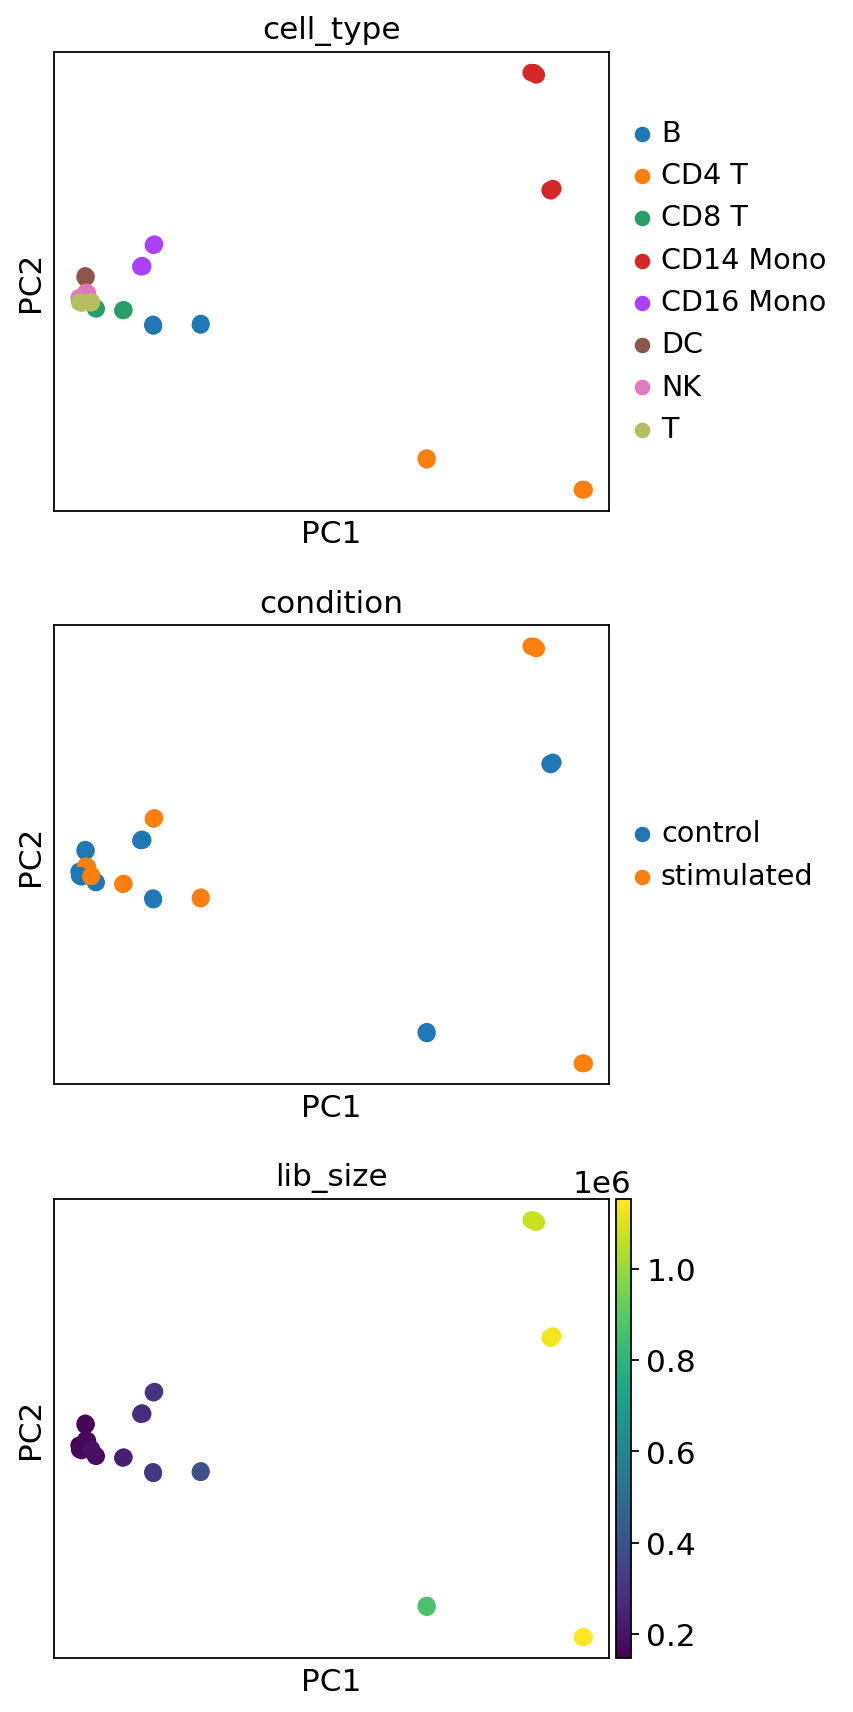

In [52]:
sc.pp.pca(pb_data)
sc.pl.pca(pb_data, color=pb_data.obs, ncols=1, size=250)

The CD14 Monocyte and CD4 T cells form the two largest clusters in the data as evident in the UMAP representations. So, we observe that PC1 captures cluster size instead of biological variability (i.e. variation due to cell type, or stimulus effect) - that is the proportion and composition of cell types bias the observed variability in pseudo-bulk data, since the library size (sum of the reads per sample) is higher in more abundant cell types.

We adjust for differences in library sizes between pseudo-bulks by applying $\log_2$ Counts-Per-Million (CPM) transformation, a common normalisation technique in bulk RNA-seq.

In [53]:
# we will need to work with log-CPMs for fry
y = pb_data.X.T

In [54]:
%%R -i y
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)

In [55]:
%%R -o logCPM
logCPM = data.frame(logCPM)

In [56]:
pb_data.uns['logCPM_allgenes'] = logCPM.T

In [57]:
pb_data.obsm['logCPM_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

In [58]:
pb_data

AnnData object with n_obs × n_vars = 45 × 14053
    obs: 'cell_type', 'condition', 'lib_size'
    uns: 'pca', 'cell_type_colors', 'condition_colors', 'logCPM_allgenes'
    obsm: 'X_pca', 'logCPM_pca'
    varm: 'PCs'

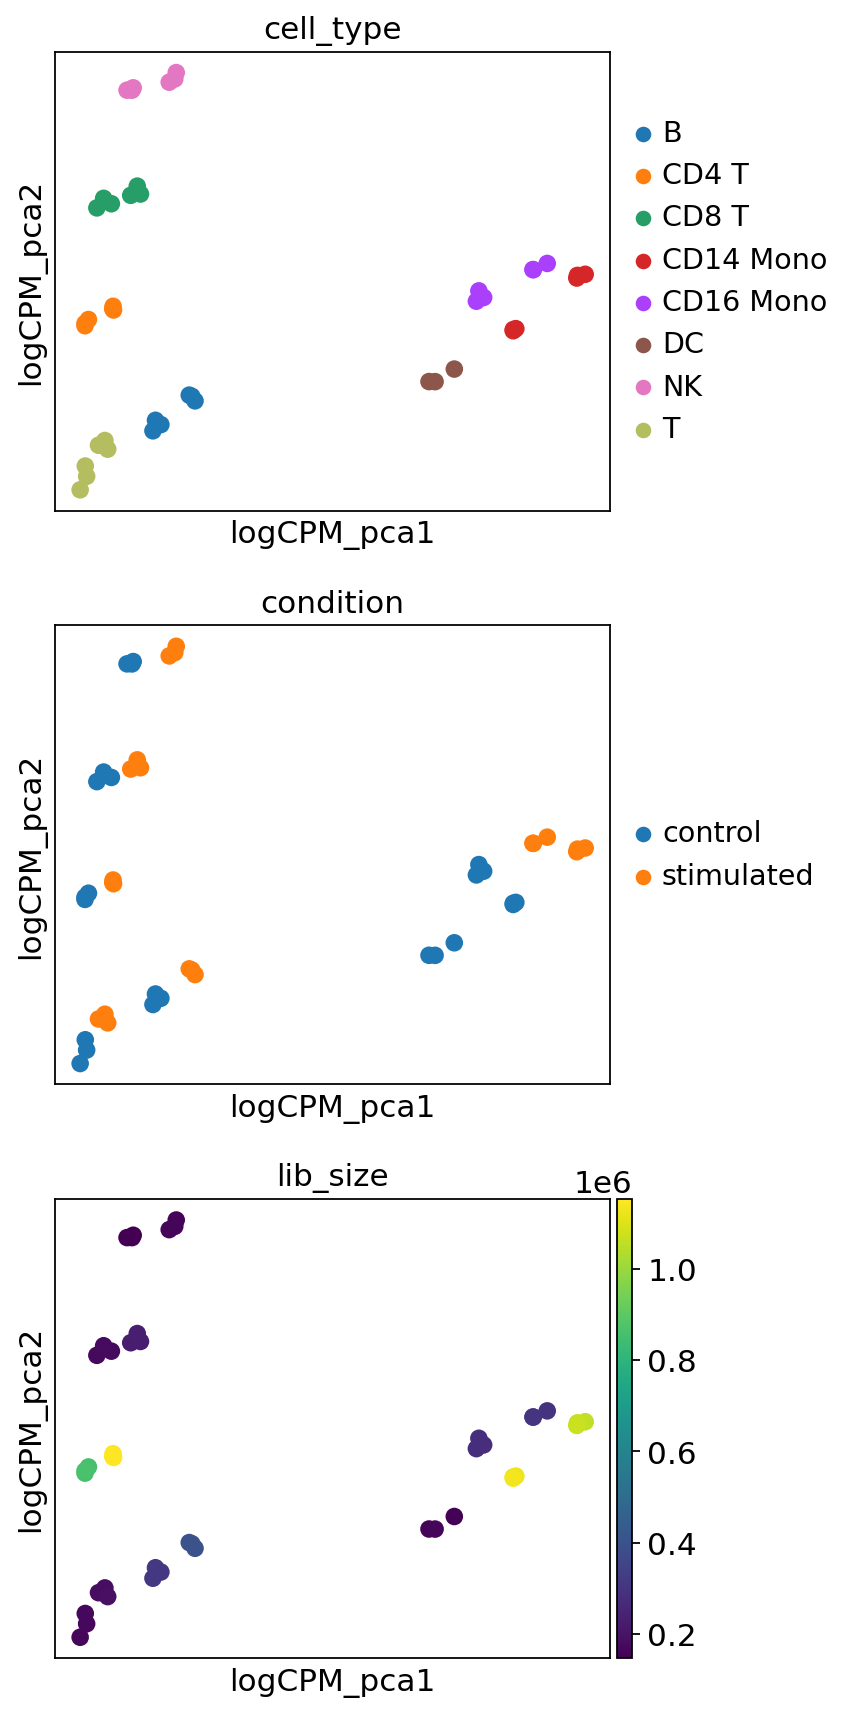

In [59]:
sc.pl.embedding(pb_data, 'logCPM_pca', color=pb_data.obs, ncols=1, size=250)

After adjusting for differences in library sizes, PC1 now captures difference between lymphoid (T, NK, B) and myeloid (Mono, DC) populations. That looks good! However, the variation due to administration of stimulus (i.e. difference between control and stimulated pseduo-replicates) is still not captured by any of the first two PCs. Ideally, the variation of interest has to be detectable in top few PCs of the pseudo-bulk data. In this case, since we are indeed interested in stimulation effect per cell type, we proceed to gene set testing.

Let's first set set-up the design and conrast matrices:

In [60]:
groups = pb_data.obs.condition.astype('string') + '_' + pb_data.obs.cell_type

In [61]:
%%R -i groups
group <-  as.factor(gsub(" ","_", groups))
design <- model.matrix(~ 0 + group)
head(design)

     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]    1    0    0    0    0    0    0    0    0     0     0     0     0     0
[2,]    1    0    0    0    0    0    0    0    0     0     0     0     0     0
[3,]    1    0    0    0    0    0    0    0    0     0     0     0     0     0
[4,]    0    0    0    0    0    0    0    0    1     0     0     0     0     0
[5,]    0    0    0    0    0    0    0    0    1     0     0     0     0     0
[6,]    0    0    0    0    0    0    0    0    1     0     0     0     0     0
     [,15]
[1,]     0
[2,]     0
[3,]     0
[4,]     0
[5,]     0
[6,]     0


In [62]:
%%R
colnames(design)

 [1] "groupcontrol_B"            "groupcontrol_CD14_Mono"   
 [3] "groupcontrol_CD16_Mono"    "groupcontrol_CD4_T"       
 [5] "groupcontrol_CD8_T"        "groupcontrol_DC"          
 [7] "groupcontrol_NK"           "groupcontrol_T"           
 [9] "groupstimulated_B"         "groupstimulated_CD14_Mono"
[11] "groupstimulated_CD16_Mono" "groupstimulated_CD4_T"    
[13] "groupstimulated_CD8_T"     "groupstimulated_NK"       
[15] "groupstimulated_T"        


In [63]:
%%R 
kang_pbmc_con <- limma::makeContrasts(
    
    # the effect if stimulus in CD16 Monocyte cells
    groupstimulated_CD16_Mono - groupcontrol_CD16_Mono,
    
    # the effect of stimulus in CD16 Monocytes compared to CD8 T Cells
    (groupstimulated_CD16_Mono - groupcontrol_CD16_Mono) - (groupstimulated_CD8_T - groupcontrol_CD8_T), 
    levels = design
)

Index the genes annotated in each pathway in our data as follow:

In [64]:
var_names = pb_data.var_names

In [65]:
%%R -i var_names
# rownames(logCPM) <- var_names[keep]
rownames(logCPM) <- var_names
idx <- limma::ids2indices(pathways, rownames(logCPM))

As done in the `fgsea` method, let's remove gene sets with less than 15 genes

In [66]:
%%R
keep_gs <- lapply(idx, FUN=function(x) length(x) >= 15)

In [67]:
%%R
idx <- idx[unlist(keep_gs)]

Now that we have set up the design and contrast matrices, and have indexed the genes in each pathway in our data, we can call `fry()` to test for enriched pathways in each of the contrasts we set above:

#### fry test for Stimulated vs Control

In [68]:
%%R
res <- limma::fry(logCPM, index = idx, design = design, contrast = kang_pbmc_con[,1])

Let's print top few lines of fry's output

In [69]:
%%R
NUM_CHARS = 80
# trim long pathway names
rownames(res) <- sapply(rownames(res), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
head(res)

                                                                                 NGenes
REACTOME_METABOLISM_OF_RNA                                                          630
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING                                             57
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA                            232
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_A     93
REACTOME_CELLULAR_RESPONSES_TO_STIMULI                                              628
REACTOME_RRNA_PROCESSING                                                            188
                                                                                 Direction
REACTOME_METABOLISM_OF_RNA                                                            Down
REACTOME_INTERFERON_ALPHA_BETA_SIGNALING                                                Up
REACTOME_PROCESSING_OF_CAPPED_INTRON_CONTAINING_PRE_MRNA                              Down
REACTOME_RESPIRATORY

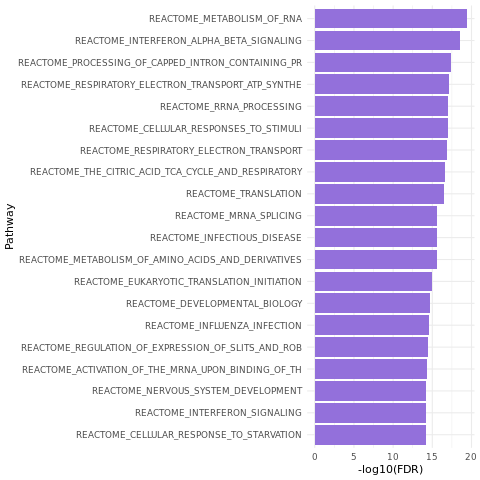

In [70]:
%%R
NUM_CHARS <- 50
ggdat <- res[1:20,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#9370DB") + coord_flip() +
    xlab('Pathway') + theme_minimal()

#### fry test for the comparison between two stimulated cell types

In [71]:
%%R
res <- limma::fry(logCPM, index = idx, design = design, contrast = kang_pbmc_con[,2])

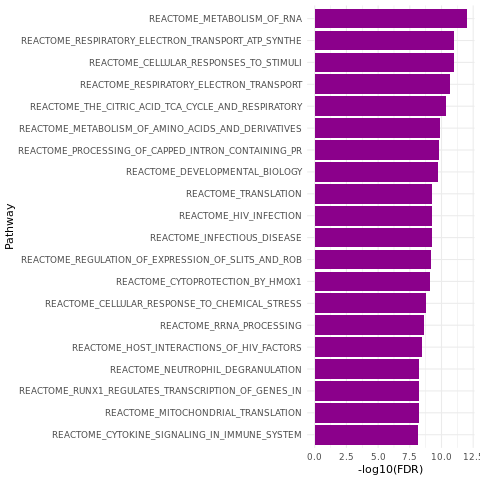

In [72]:
%%R
ggdat <- res[1:20,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#8B008B") + coord_flip() +
    xlab('Pathway') + theme_minimal()

As demonstrated above, limma-fry can accomodate gene set enrichment tests for datasets and research problems with complex experimental designs. Both `fgsea` and `fry` provide insights into the direction of enrichment (ES field in `fgsea` and Direction field in `fry`). They both can be applied to clusters of cells or pseudo-bulk samples. However,  Unlike `fgsea`, more flexible tests can be carried out with `fry`. In addition, `fry` can reveal if genes in a pathway are changing between the experimental conditions but in consistent or inconsistent directions. Pathways in which the genes change in consistent direction are identified with `FDR` < 0.05. Pathways in which the genes are DE between the conditions but they change in different, inconsistent directions can be identified where `FDR` > 0.05, but `FDR.Mixed` < 0.05 (assuming 0.05 is the desired significance level). Therefore, the results by `fry` might be of more interest biologically. 

#### On the effect of  filtering low-expression genes

As mentioned before, Ideally, the variation of interest has to be detectable in top few PCs of the pseudo-bulk data. 
Let's remove genes with low expression in the data, apply $\log_2$CPM transformation and repeat the PCA plots:

In [73]:
%%R -i y
keep <- edgeR::filterByExpr(y) # in real analysis, supply the desig matrix to the function to retain as more genes as possible
y <- y[keep,]
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)

R[write to console]: No group or design set. Assuming all samples belong to one group.



In [74]:
%%R -o logCPM
logCPM = data.frame(logCPM)

In [75]:
pb_data.uns['logCPM_FLE'] = logCPM.T # FLE for filter low exprs

In [76]:
pb_data.obsm['logCPM_FLE_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

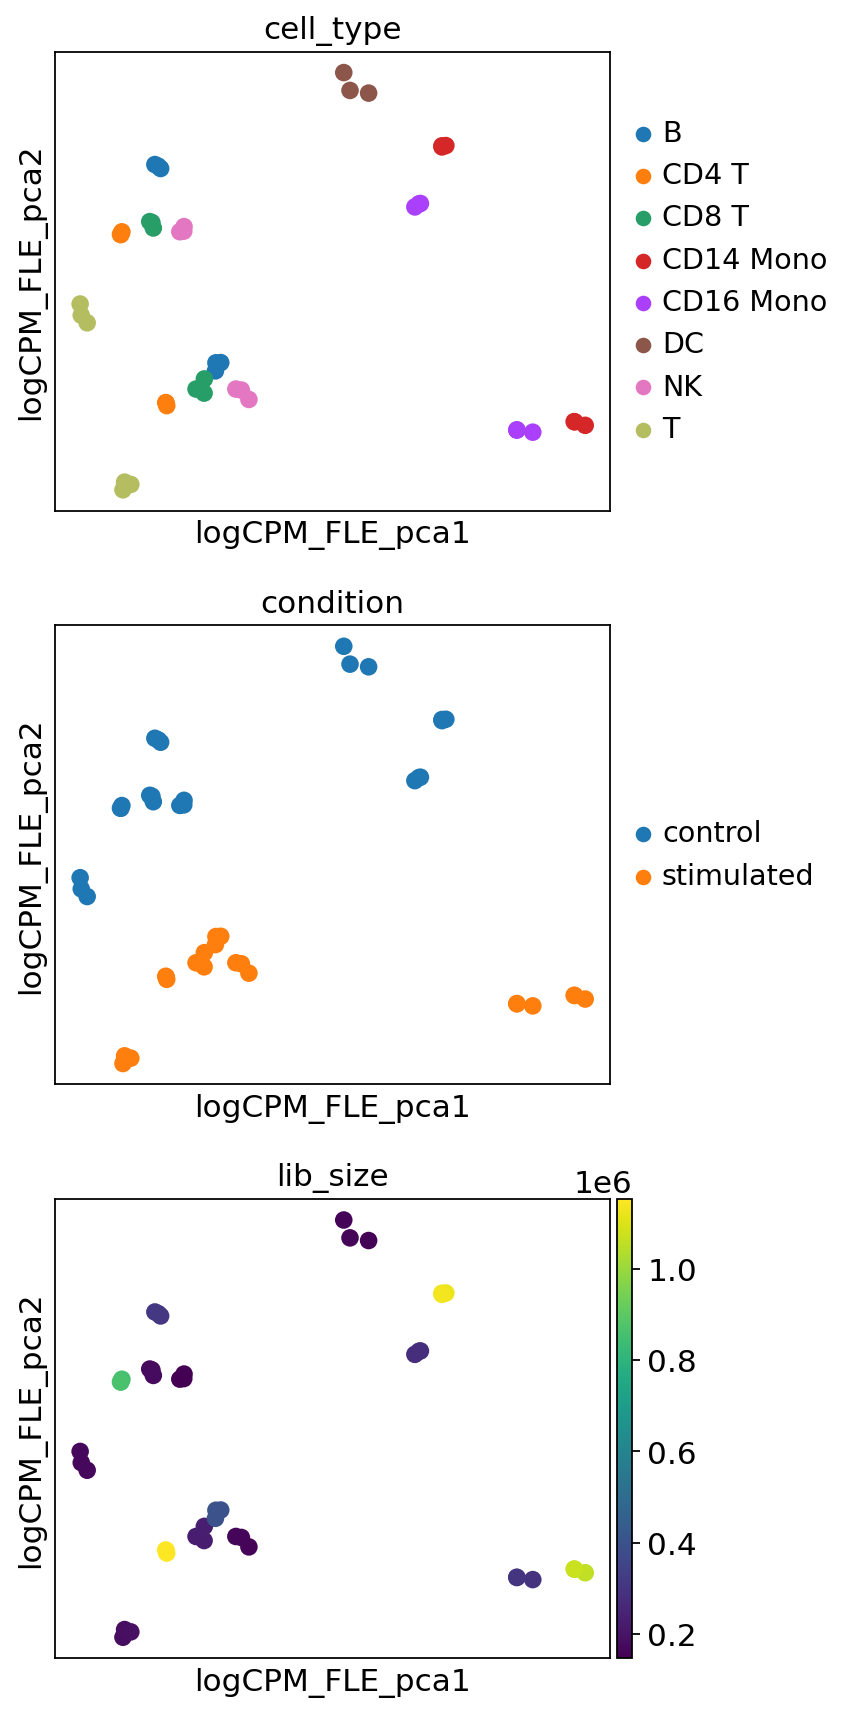

In [77]:
sc.pl.embedding(pb_data, 'logCPM_FLE_pca', color=pb_data.obs, ncols=1, size=250)

Here, "logCPM_FLE" denotes filtering for low expressed genes followed by $\log_2$CPM transformation. We can now clearly observe that PC1 captures cell type effect and PC2 captures the treatment effect, when low-expressed genes are removed and differences between library sizes are adjusted by $\log_2$CPM transformation. 

Since in this case study we are indeed interested in stimulation effect per cell type, and this variation is better preseved before gene filtering, we presented the enrichment test results on unfiltered data. 
In practice, filtering low abundance genes and computation of normalisation factors by `edgeR::calcNormFactors` are standard part of bulk RNA-seq analysis workflow. Should we have been interested in global effects of IFN stimulation, we should have used the filtered data. Additionally, one can note that `design <- model.matrix(~ 0 + lineage + group)` would take into account differences (that is baseline expression differences) between myeloid and lymphoid lineages, improving the separation of pseudo-bulk samples by IFN stimulation, possibly along PC1.  In this case study, we were interested in cell type-specific effects, hence we stayed with a model of data whereby the variability along PC1 is by cell type. The choice of design matrix has to be carefully considered to align with the biological question of interest. 

In [78]:
%%R
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /mnt/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/bp-pathway/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=C                 LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggplot2_3.3.5               AUCell_1.16.0              
 [3] fgsea_1.20.0                SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IR